In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
X,y = fetch_california_housing(return_X_y=True,as_frame=True)
X.shape, y.shape

((20640, 8), (20640,))

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
#REmove the Latitude and Longitude column
X = X.iloc[:,:-2]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [6]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [7]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


#### Split the data into train and test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
def plots(df, col, model):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[col])
    plt.title("before stdScaler")
    
    plt.subplot(122)
    p1 = model.fit_transform(df[[col]]).flatten()
    sns.kdeplot(p1)
    plt.title('after stdScaler')

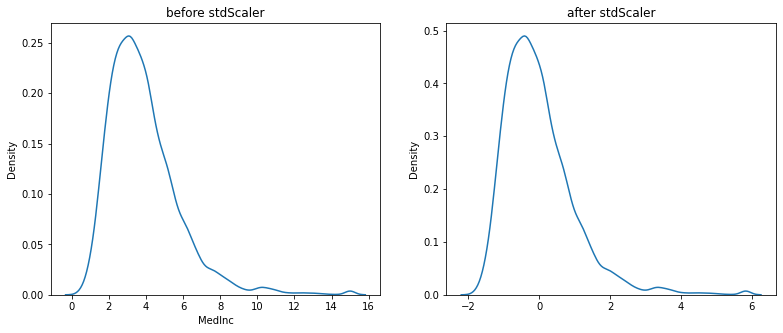

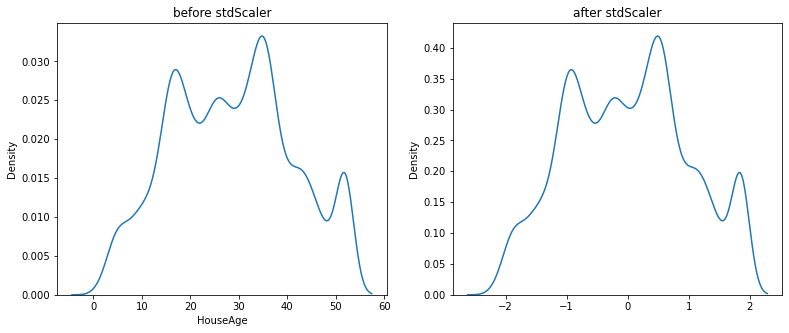

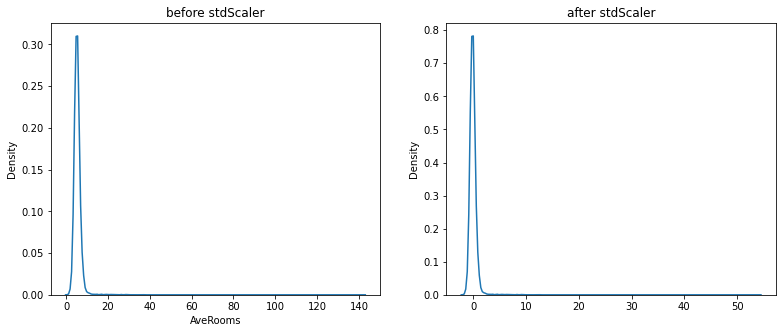

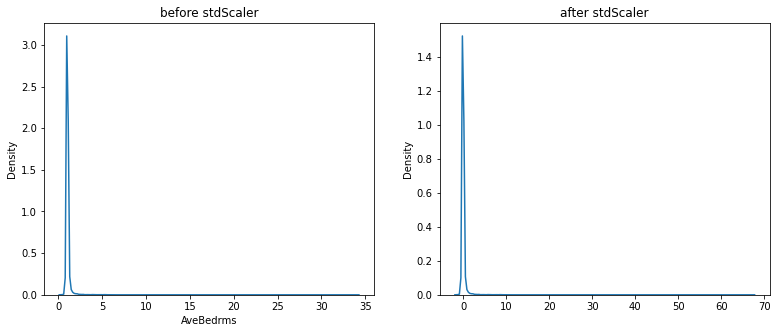

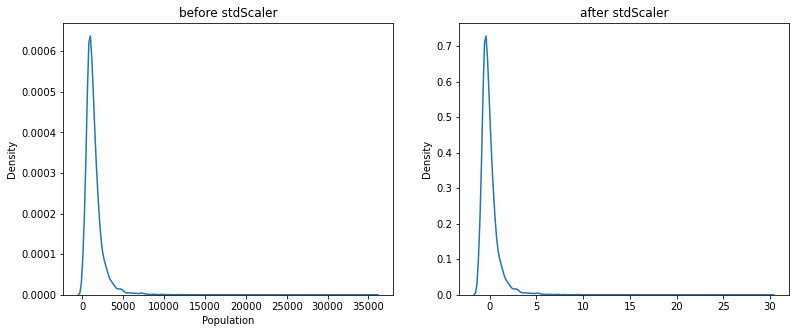

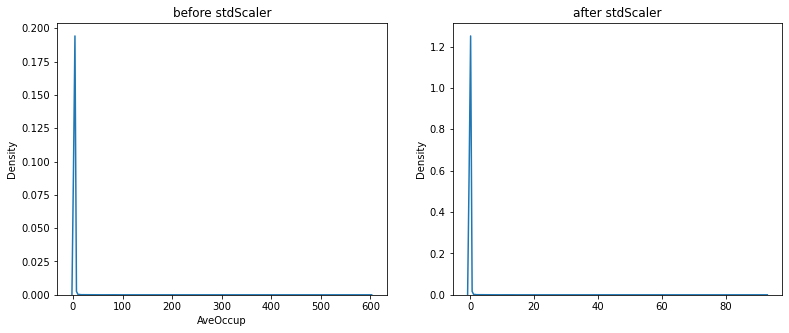

In [10]:
for col in X_train.columns:
    plots(X_train,col, StandardScaler())

#### check the model accuracy with and without StandardScalar

In [11]:
def model_accuracy_scaled(model):
    model_scaled = Pipeline([
        ("scaled", StandardScaler()),
        ("model", model)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(model):
    model_unscaled = Pipeline([
        ('model', model)
    ])
    model_unscaled.fit(X_train,y_train)
    return model_unscaled.score(X_test, y_test)

In [12]:
model_accuracy_scaled(KNeighborsRegressor())

0.5892398258820833

In [13]:
model_accuracy_unscaled(KNeighborsRegressor())

0.17191143873653625

#### For KNeighborsRegressor, with scaled data gives high accuracy

In [14]:
model_accuracy_scaled(RandomForestRegressor())

0.6705848164816548

In [15]:
model_accuracy_unscaled(RandomForestRegressor())

0.668445957174643

#### For RandomForestRegressor, the scaling of data doesnt make much difference

#### Hance, StandardScaler doesnt affect the Tree Based Model